# Sales Analysis

### Import Necessary Libraries

In [1]:
import pandas as pd
import os

#### Загрузим файлы

In [115]:
files = [file for file in os.listdir('./SalesAnalysis/Sales_Data')]
df = pd.DataFrame()
folder = './SalesAnalysis/Sales_Data/'
for file in files:
    temp_df = pd.read_csv(folder+file)
    df = pd.concat([df, temp_df])

In [116]:
df.shape

(186850, 6)

#### Выкинем нули

In [117]:
df.dropna(inplace=True)

In [118]:
df.shape

(186305, 6)

##### Создадим фильтр для значений, в которых просто текст

In [121]:
filter = df['Order Date'].str.contains('O')

In [131]:
df = df.drop(df[filter].index)

In [132]:
df.shape

(182735, 6)

#### Пропарсим Order Date  в DateTime формат

In [134]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')

In [138]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [140]:
df['Month'] = df['Order Date'].dt.month

In [145]:
df.Month.unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10], dtype=int64)

In [147]:
df.Month.nunique()

12

#### Ресетнул индексы

In [156]:
df.reset_index(inplace=True)

In [158]:
df.drop(['index'], axis=1, inplace= True)

In [159]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
182730,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
182731,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
182732,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
182733,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


#### Приведу столбцы к нужному формату

In [187]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
dtype: object

In [189]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

In [191]:
df['Price Each'] = df['Price Each'].astype(float)

#### Create column 'Income'

In [192]:
df['Income'] = df['Quantity Ordered'] * df['Price Each']

In [197]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Income
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
182730,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
182731,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
182732,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
182733,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


### Расчет доходов по месяцам

In [204]:
df.groupby('Month').sum().sort_values('Income')

,Quantity Ordered,Price Each,Income
Month,,,
1,10670,1.776156e+06,1.786511e+06
9,12827,2.038020e+06,2.050361e+06
2,13162,2.145209e+06,2.158127e+06
8,13185,2.178184e+06,2.191698e+06
6,14964,2.508863e+06,2.524465e+06
7,15781,2.572765e+06,2.587445e+06
3,16697,2.740393e+06,2.755969e+06
5,18344,3.084756e+06,3.101881e+06
11,19479,3.130969e+06,3.149785e+06


## Ща нарисуем барплот, чтобы показать изменение дохода по месяцам

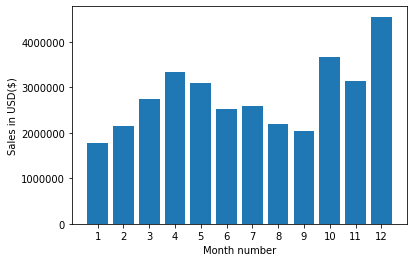

In [212]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, df.groupby('Month').sum()['Income'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month number')
plt.show()

In [213]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Income
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
182730,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
182731,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
182732,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
182733,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


## Now, I'm gonna add a new column City

In [230]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

In [231]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Income,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
182730,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
182731,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
182732,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
182733,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


### Let's plot it!

In [234]:
df.groupby('City').sum()['Income']

City
 Atlanta (GA)          2.741642e+06
 Austin (TX)           1.786746e+06
 Boston (MA)           3.604081e+06
 Dallas (TX)           2.717794e+06
 Los Angeles (CA)      5.354040e+06
 New York City (NY)    4.581659e+06
 Portland (ME)         4.441105e+05
 Portland (OR)         1.832539e+06
 San Francisco (CA)    8.124121e+06
 Seattle (WA)          2.693049e+06
Name: Income, dtype: float64

In [260]:
sorted(df.City.unique())

[' Atlanta (GA)',
 ' Austin (TX)',
 ' Boston (MA)',
 ' Dallas (TX)',
 ' Los Angeles (CA)',
 ' New York City (NY)',
 ' Portland (ME)',
 ' Portland (OR)',
 ' San Francisco (CA)',
 ' Seattle (WA)']

In [259]:
df.City.unique()

array([' Dallas (TX)', ' Boston (MA)', ' Los Angeles (CA)',
       ' San Francisco (CA)', ' Seattle (WA)', ' Atlanta (GA)',
       ' New York City (NY)', ' Portland (OR)', ' Austin (TX)',
       ' Portland (ME)'], dtype=object)

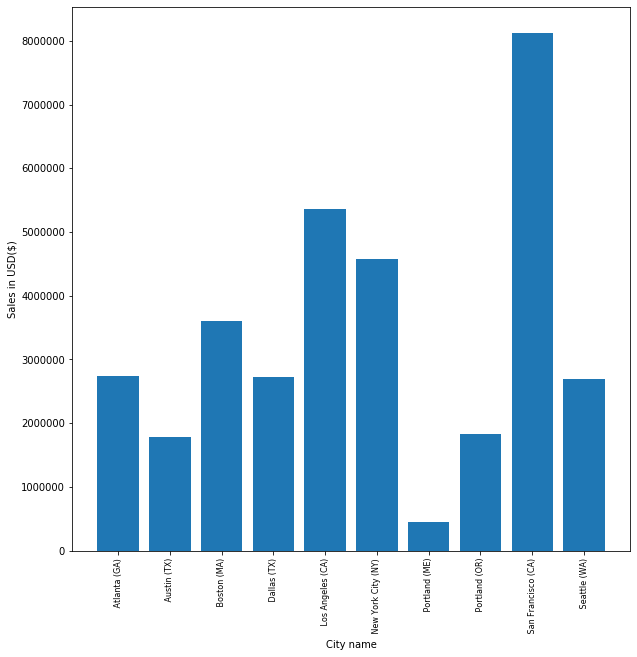

In [271]:
#cities = [city for city, df in all df.groupby('City')]
# Так и не понял как это работает  ^

plt.figure(figsize=[10,10])
plt.xticks( rotation = 'vertical', size=8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City name')
plt.bar(sorted(df['City'].unique()), df.groupby('City').sum()['Income'])
plt.show()

In [275]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute

In [276]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Income,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
182730,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56
182731,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0
182732,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39
182733,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30


In [277]:
# Обрати внимание какая плюшка. Впервые такое вижу
hours = [hour for hour, df in df.groupby('Hour')]

Text(0, 0.5, 'Number of Orders')

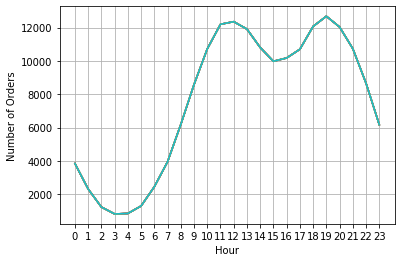

In [284]:
plt.plot(hours, df.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')

## What products are most often sold together?

In [296]:
new_df = df[df['Order ID'].duplicated(keep=False)]
new_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Income,City,Hour,Minute
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
...,...,...,...,...,...,...,...,...,...,...,...
182678,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,18
182689,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,25
182690,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,25
182726,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,49


In [297]:
new_df.groupby('Order ID').count().sort_values('Product')

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Income,City,Hour,Minute
Order ID,,,,,,,,,,
141275,2,2,2,2,2,2,2,2,2,2
258903,2,2,2,2,2,2,2,2,2,2
258900,2,2,2,2,2,2,2,2,2,2
258878,2,2,2,2,2,2,2,2,2,2
258848,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
263918,4,4,4,4,4,4,4,4,4,4
289117,4,4,4,4,4,4,4,4,4,4
304802,4,4,4,4,4,4,4,4,4,4


In [299]:
new_df = df[df['Order ID'].duplicated(keep=False)]

In [300]:
new_df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

new_df

C:\Users\Hello\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Income,City,Hour,Minute,Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
182678,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
182689,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
182690,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
182726,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,49,"Google Phone,USB-C Charging Cable"


In [301]:
new_df = new_df[['Order ID', 'Grouped']].drop_duplicates()

In [302]:
#Что-то новенькое :)
from itertools import combinations
from collections import Counter

In [303]:
#ща короче будет пинцет что за трюк дабы просчитать комбинации возможных товаров
new_df

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
182668,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
182670,259297,"Lightning Charging Cable,Lightning Charging Cable"
182677,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
182689,259314,"Wired Headphones,AAA Batteries (4-pack)"


### Топ самых продаваемых комбинаций товаров, айфоны в лидерах :)

In [311]:
count = Counter()
for row in new_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
#print(count)
#count.most_common()
for key, value in count.most_common(10):
    print(f'{key[0]}, {key[1]} - {value}')

iPhone, Lightning Charging Cable - 973
Google Phone, USB-C Charging Cable - 954
iPhone, Wired Headphones - 437
Google Phone, Wired Headphones - 401
Vareebadd Phone, USB-C Charging Cable - 348
iPhone, Apple Airpods Headphones - 343
Google Phone, Bose SoundSport Headphones - 219
USB-C Charging Cable, Wired Headphones - 156
Vareebadd Phone, Wired Headphones - 141
Lightning Charging Cable, Wired Headphones - 92


## What product sold the most? Why do you think it sold the most?

In [315]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Income,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [316]:
product_group = df.groupby('Product')

In [322]:
product_group.sum()

,Quantity Ordered,Price Each,Month,Income,Hour,Minute
Product,,,,,,
20in Monitor,4058,443479.68,28835,446339.42,57779,120242
27in 4K Gaming Monitor,6134,2387518.78,43703,2392198.66,89188,180918
27in FHD Monitor,7429,1107826.14,51674,1114275.71,105823,216217
34in Ultrawide Monitor,6076,2301979.42,42521,2308819.24,87340,179874
AA Batteries (4-pack),27148,77621.76,142996,104248.32,293174,598583
AAA Batteries (4-pack),30487,60676.07,144098,91156.13,292400,602114
Apple Airpods Headphones,15383,2290950.00,107678,2307450.00,219184,447329
Bose SoundSport Headphones,13236,1310768.91,92676,1323467.64,189216,386247
Flatscreen TV,4724,1411500.00,33592,1417200.00,67412,139785


In [323]:
quantity_ordered = product_group.sum()['Quantity Ordered']

In [324]:
products = [product for product, df in product_group ]

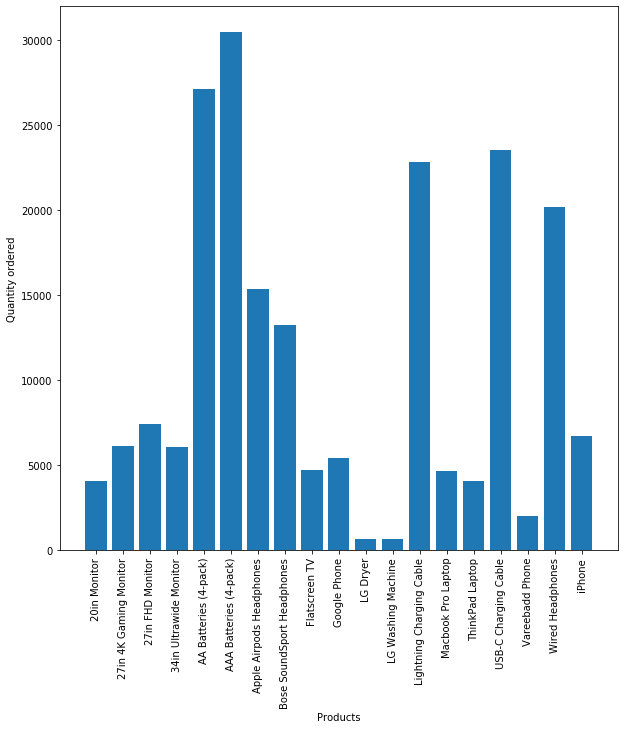

In [334]:
plt.figure(figsize=(10,10))
plt.bar(products, quantity_ordered)
plt.xticks( rotation = 'vertical', size=10)

plt.xlabel('Products')
plt.ylabel('Quantity ordered')

plt.show()